### Sum of two independent Gaussian variables

Two continous independent Gaussian variables $x$ and $y$, given corresponding probability density functions $f_1$ and $f_2$:

$f_1 \sim N(\mu_1, \sigma_1^2)$

$f_2 \sim N(\mu_2, \sigma_2^2)$

The probability density function $f_3$ of variable $z = x+y$ is calculated by following formula:

$f_3(z) = \int_{-\infty}^{+\infty} f_1(x)f_2(z-x)dx$

Variable $z$ is still Gaussian variable. 

$f_3 \sim N(\mu_1+\mu_2, \sigma_1^2+\sigma_2^2)$

We can show this property by following code.

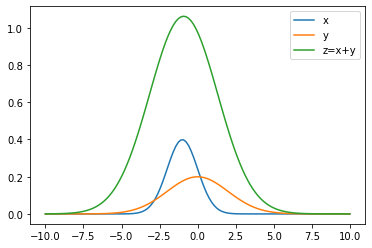

In [37]:
import numpy as np
from scipy import signal
import scipy.stats as stats
from matplotlib import pyplot as plt

x = np.linspace(-10, 10, 120)
pdf_1 = stats.norm.pdf(x, -1, 1)
pdf_2 = stats.norm.pdf(x, 0, 2)
pdf_1_2 = signal.fftconvolve(pdf_1, pdf_2,'same')

plt.plot(x, pdf_1, label='x')
plt.plot(x, pdf_2, label='y')
plt.plot(x, pdf_1_2, label='z=x+y')

plt.legend()
plt.show()

-------------------------------

### Gaussian mixture

**1.Mix with original probability density functions**

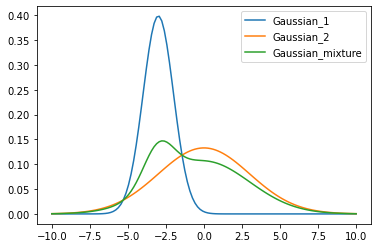

In [38]:
import numpy as np
from scipy import signal
import scipy.stats as stats
from matplotlib import pyplot as plt

x = np.linspace(-10, 10, 120)
y1 = stats.norm.pdf(x, -3, 1)
y2 = stats.norm.pdf(x, 0, 3)
y3 = 0.2 * y1 + 0.8 * y2

plt.plot(x, y1, label='Gaussian_1')
plt.plot(x, y2, label='Gaussian_2')
plt.plot(x, y3, label='Gaussian_mixture')

plt.legend()
plt.show()

Check if Gaussian mixture is a proper probability density function

In [39]:
from scipy.integrate import quad

y3_func = lambda x: 0.2 * stats.norm.pdf(x, -3, 1) + 0.8 * stats.norm.pdf(x, 0, 3)

result, _ = quad(y3_func, -np.inf, np.inf)

print(result)

1.0000000000000002


This proved that it is still a valid PDF after mixed two Gaussian PDFs with proper ratios (sum to be 1).

**2.Mix with scaled probability density functions**

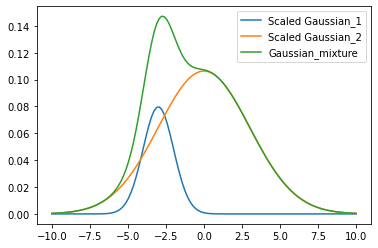

In [40]:
x = np.linspace(-10, 10, 120)
y1 = stats.norm.pdf(x, -3, 1)
y2 = stats.norm.pdf(x, 0, 3)
y3 = 0.2 * y1 + 0.8 * y2

plt.plot(x, 0.2 * y1, label='Scaled Gaussian_1')
plt.plot(x, 0.8 * y2, label='Scaled Gaussian_2')
plt.plot(x, y3, label='Gaussian_mixture')

plt.legend()
plt.show()

This is the result which scaled the original PDFs. Sometimes it confuses a lot of guys.

-----------------------------